In [3]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_dir = "C:\\Users\\nilss\\coding\\material\\ki_workshop\\data"
os.chdir(data_dir)

# Introducing MGH data

- [Olink MGH Intro](https://www.olink.com/mgh-covid-study/)
- [Olink MGH Overview](https://info.olink.com/mgh-covid-study-overview-page)
- [Published Article](https://www.cell.com/action/showPdf?pii=S2666-3791%2821%2900115-4)

**Data from 384 patients**
- Clinical data
- Protein data from [Olink](https://olink.com/products-services/)





We are combining OLINK & clinical data from Covid patients. Specifically, we are replicating figure B (page 5) from the published article

![...](https://raw.githubusercontent.com/NilsSkoglund/ki_workshop/main/data/olink_umap.png)

In [10]:
clinical = pd.read_csv('clinical_with_severity.csv')
olink = pd.read_csv('MGH_COVID_OLINK_NPX.csv')

## First inspection | Clinical data

In [22]:
clinical

,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,DIABETES,HTN,IMMUNO,...,crp_3_cat,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat
0,1,1,1,4,0,0,0,0,0,0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2,2,0,0,0,0,0,0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,3,4,0,1,0,0,0,0,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2,0,0,0,0,0,0,...,2.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,3,3,0,0,0,1,1,0,...,5.0,3.0,NaN,3.0,5.0,3.0,1.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,382,1,1,3,0,0,0,0,0,0,...,4.0,3.0,3.0,3.0,1.0,1.0,1.0,5.0,3.0,2.0
380,383,1,5,1,0,0,1,1,1,0,...,NaN,5.0,3.0,5.0,2.0,2.0,3.0,NaN,NaN,NaN
381,384,1,5,2,1,0,0,0,1,0,...,3.0,3.0,2.0,2.0,2.0,3.0,2.0,NaN,NaN,NaN
382,385,1,3,3,0,0,0,0,0,0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       384 non-null    int64  
 1   COVID            384 non-null    int64  
 2   Age cat          384 non-null    int64  
 3   BMI cat          384 non-null    int64  
 4   HEART            384 non-null    int64  
 5   LUNG             384 non-null    int64  
 6   KIDNEY           384 non-null    int64  
 7   DIABETES         384 non-null    int64  
 8   HTN              384 non-null    int64  
 9   IMMUNO           384 non-null    int64  
 10  Resp_Symp        384 non-null    int64  
 11  Fever_Sympt      384 non-null    int64  
 12  GI_Symp          384 non-null    int64  
 13  WHO 0            384 non-null    int64  
 14  WHO 3            384 non-null    int64  
 15  WHO 7            384 non-null    int64  
 16  WHO 28           384 non-null    int64  
 17  WHO max         

In [23]:
clinical.COVID.value_counts()

1    306
0     78
Name: COVID, dtype: int64

<AxesSubplot:xlabel='Age cat', ylabel='count'>

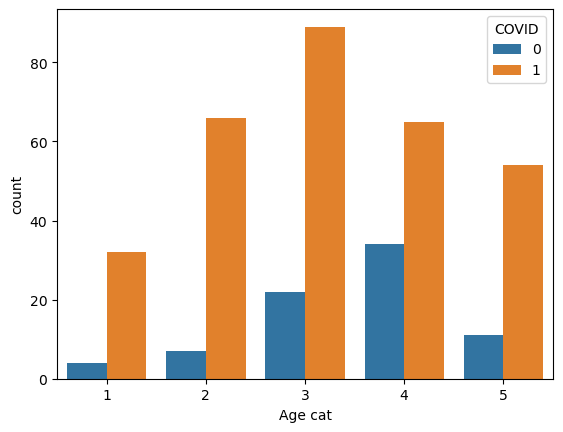

In [37]:
sns.countplot(data=clinical, x="Age cat", hue="COVID")

<AxesSubplot:>

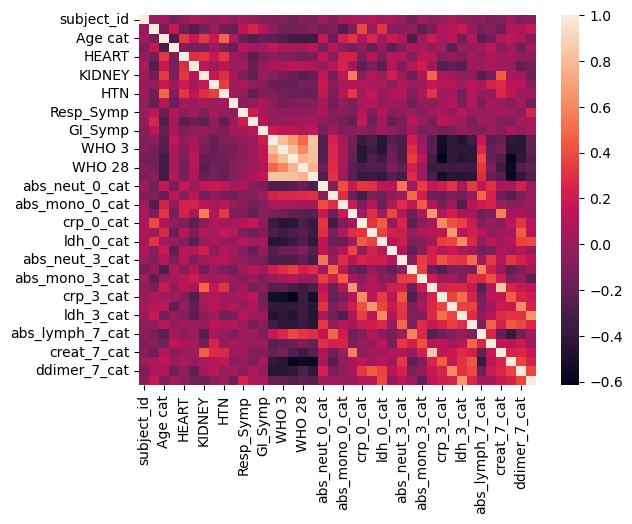

In [38]:
sns.heatmap(clinical.corr())

<AxesSubplot:>

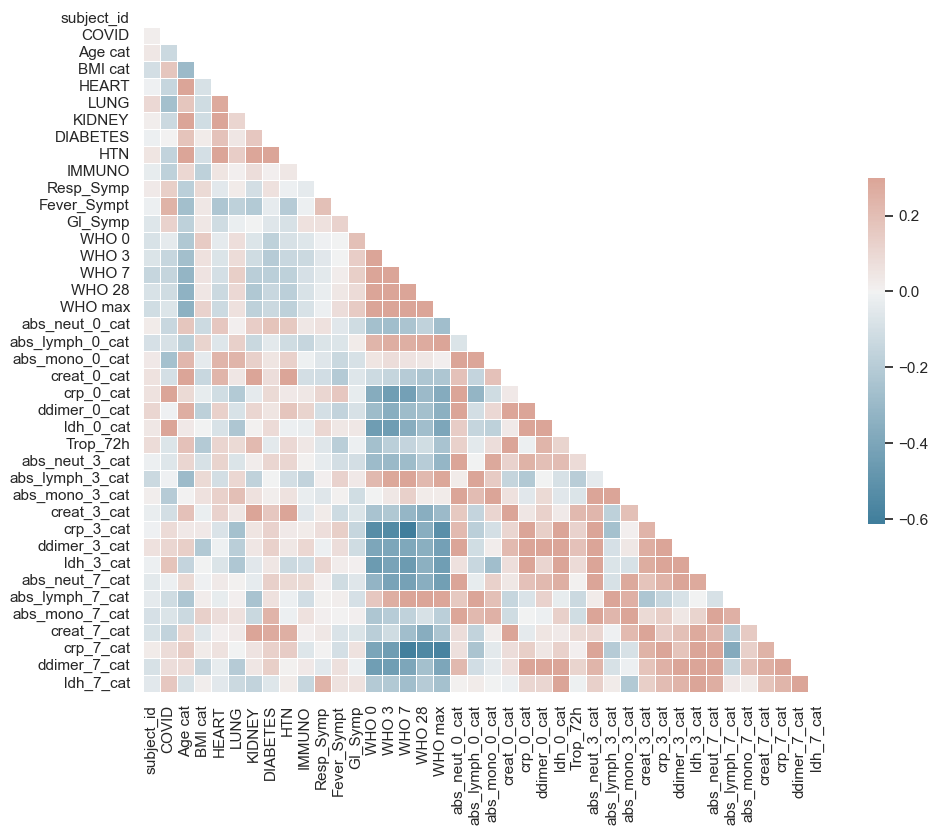

In [42]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = clinical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## First inspection | Olink data 

In [11]:
olink.shape

(1148916, 9)

In [12]:
olink.head()

,SampleID,subject_id,Timepoint,OlinkID,UniProt,Panel,PlateID,LOD,NPX
0,1_D0,1.0,D0,OID21311,Q9BTE6,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.7204,3.2277
1,1_D0,1.0,D0,OID20921,Q96IU4,NEUROLOGY,20200772_Plate5_NEURO_ONC,0.5696,0.7205
2,1_D0,1.0,D0,OID21280,P00519,ONCOLOGY,20200772_Plate5_NEURO_ONC,0.5313,2.6293
3,1_D0,1.0,D0,OID21269,P09110,ONCOLOGY,20200772_Plate5_NEURO_ONC,2.0588,3.2670
4,1_D0,1.0,D0,OID20159,P16112,CARDIOMETABOLIC,20200772_Plate5_CARDIO_INF,1.1623,2.0308


In [13]:
olink = olink[["SampleID", "UniProt", "NPX"]]
olink.head()

,SampleID,UniProt,NPX
0,1_D0,Q9BTE6,3.2277
1,1_D0,Q96IU4,0.7205
2,1_D0,P00519,2.6293
3,1_D0,P09110,3.2670
4,1_D0,P16112,2.0308


In [199]:
# 1420 different UniProt with NPX values per SampleId
olink.UniProt.nunique()

1420

In [198]:
# 18 values missing for NPX
olink.isna().value_counts()

SampleID  UniProt  NPX  
False     False    False    1148898
                   True          18
dtype: int64

## Preprocessing OLINK data

In [ ]:
# reshaping

In [16]:
olink_reshaped = olink.pivot_table(columns = "UniProt", index = "SampleID", values = "NPX")
olink_reshaped.head()

UniProt,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,O00182,O00186,O00214,...,Q9Y639,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
SampleID,,,,,,,,,,,,,,,,,,,,,
100_D0,2.6983,-1.4931,4.5123,3.2456,-0.3516,4.9928,2.5584,8.3191,0.3410,4.2504,...,-0.2398,2.1612,3.7023,0.8750,1.3181,3.3502,5.7592,4.3084,5.2035,0.2769
100_D3,2.7147,-1.2593,4.3638,3.3748,0.1310,2.7738,3.5320,8.3648,-0.1247,3.7586,...,-1.1703,1.4708,3.3105,0.2171,-0.3029,3.2182,3.2972,4.2696,5.3624,0.5369
101_D0,2.9594,-0.9196,4.5424,2.6312,0.3842,3.6327,3.8728,8.1638,0.4567,3.3950,...,-0.0203,2.8454,2.9000,1.9912,0.5056,3.1647,4.0750,3.7724,4.3914,0.7175
101_D3,2.4300,-1.3807,3.8295,2.6096,1.8467,1.5265,3.9832,7.7957,-0.0204,2.7962,...,-0.0852,1.6959,2.2027,-0.4128,-0.1009,2.6787,2.1700,3.5052,4.3469,0.5136
101_D7,3.1463,-0.0797,4.1139,2.1486,1.7757,9.2506,6.0622,8.6902,5.0129,8.7573,...,0.2421,2.4914,2.1242,2.5282,6.4046,3.8991,9.1881,4.0801,5.1339,0.4630


In [17]:
# imputing for missing values
olink_reshaped.isna().sum().sum()

18

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
olink_reshaped[:] = imputer.fit_transform(olink_reshaped)

In [19]:
olink_reshaped.isna().sum().sum()

0

In [206]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
olink_reshaped[:] = scaler.fit_transform(olink_reshaped)

In [ ]:
# truncating outliers
    # truncating z-scores at +-4 (following the study)

In [208]:
def trunc_4(x):
    if x > 4:
        return 4
    elif x < -4:
        return -4
    else:
        return x

In [209]:
olink_reshaped = olink_reshaped.applymap(trunc_4)

## UMAP on Olink Data

In [80]:
#!pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=616ff1392ca75feeaa4db89b439292e1ed987bea88157ee622987df3481b9622
  Stored in directory: c:\users\nilss\appdata\local\pip\cache\wheels\f4\3e\1c\596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=16b6cdbc56d641936db2bad2c793cd58a791998ed70b6fcb27c20f3d66e2bfbc
  Stored in directory: c:\users\nilss\appdata\local\pip\cache\wheels\b9\89\cc\59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [21]:
import umap

In [22]:
olink_reshaped.shape

(786, 1420)

In [23]:
reducer = umap.UMAP(random_state = 1)
embedding = reducer.fit_transform(olink_reshaped)
embedding = pd.DataFrame(embedding)
embedding.shape

(786, 2)

In [24]:
embedding.head()

,0,1
0,11.594920,7.946642
1,11.555251,4.272931
2,12.642255,6.294331
3,12.854843,4.785643
4,9.194918,10.268641


<AxesSubplot:xlabel='0', ylabel='1'>

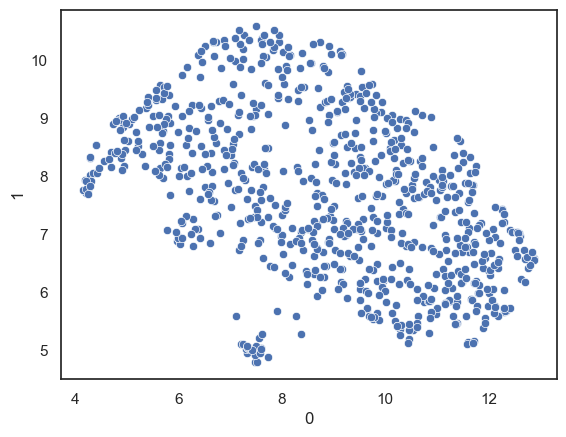

In [186]:
sns.scatterplot(data = embedding, x = 0, y = 1)

## Adding in Clinical data

In [25]:
# add in sample id (from olink_reshaped index column)
olink_reshaped.head()

UniProt,A1L4H1,A4D1B5,A6NI73,B1AKI9,NTproBNP,O00161,O00175,O00182,O00186,O00214,...,Q9Y639,Q9Y653,Q9Y662,Q9Y680,Q9Y6A5,Q9Y6D9,Q9Y6K9,Q9Y6N7,Q9Y6Q6,Q9Y6Y9
SampleID,,,,,,,,,,,,,,,,,,,,,
100_D0,2.6983,-1.4931,4.5123,3.2456,-0.3516,4.9928,2.5584,8.3191,0.3410,4.2504,...,-0.2398,2.1612,3.7023,0.8750,1.3181,3.3502,5.7592,4.3084,5.2035,0.2769
100_D3,2.7147,-1.2593,4.3638,3.3748,0.1310,2.7738,3.5320,8.3648,-0.1247,3.7586,...,-1.1703,1.4708,3.3105,0.2171,-0.3029,3.2182,3.2972,4.2696,5.3624,0.5369
101_D0,2.9594,-0.9196,4.5424,2.6312,0.3842,3.6327,3.8728,8.1638,0.4567,3.3950,...,-0.0203,2.8454,2.9000,1.9912,0.5056,3.1647,4.0750,3.7724,4.3914,0.7175
101_D3,2.4300,-1.3807,3.8295,2.6096,1.8467,1.5265,3.9832,7.7957,-0.0204,2.7962,...,-0.0852,1.6959,2.2027,-0.4128,-0.1009,2.6787,2.1700,3.5052,4.3469,0.5136
101_D7,3.1463,-0.0797,4.1139,2.1486,1.7757,9.2506,6.0622,8.6902,5.0129,8.7573,...,0.2421,2.4914,2.1242,2.5282,6.4046,3.8991,9.1881,4.0801,5.1339,0.4630


In [188]:
embedding["SampleId"] = olink_reshaped.index

In [189]:
# drop control samples
embedding = embedding.loc[~embedding["SampleId"].str.contains("CONTROL")]

In [190]:
# enable join with clinical data
    # extract subject_id from SampleId
    # convert to int
embedding["subject_id"] = embedding.SampleId.str.extract(r"([0-9]+)")[0]
embedding["subject_id"] = embedding["subject_id"].astype(int)
embedding.head()

,0,1,SampleId,subject_id
0,10.218000,8.821906,100_D0,100
1,10.987122,5.611681,100_D3,100
2,11.623988,7.106500,101_D0,101
3,12.011353,5.986228,101_D3,101
4,7.504181,10.579615,101_D7,101


In [212]:
final_df = embedding.merge(clinical, on="subject_id")
final_df.head()

,0,1,SampleId,subject_id,COVID,Age cat,BMI cat,HEART,LUNG,KIDNEY,...,ddimer_3_cat,ldh_3_cat,abs_neut_7_cat,abs_lymph_7_cat,abs_mono_7_cat,creat_7_cat,crp_7_cat,ddimer_7_cat,ldh_7_cat,Severity
0,10.218000,8.821906,100_D0,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
1,10.218000,8.821906,100_D0,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
2,10.987122,5.611681,100_D3,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
3,10.987122,5.611681,100_D3,100,1,1,4,0,0,0,...,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-severe
4,11.623988,7.106500,101_D0,101,1,2,1,0,0,0,...,2.0,3.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,Non-severe


## Final vizualizations, UMAP combined with clinical data

<AxesSubplot:xlabel='0', ylabel='1'>

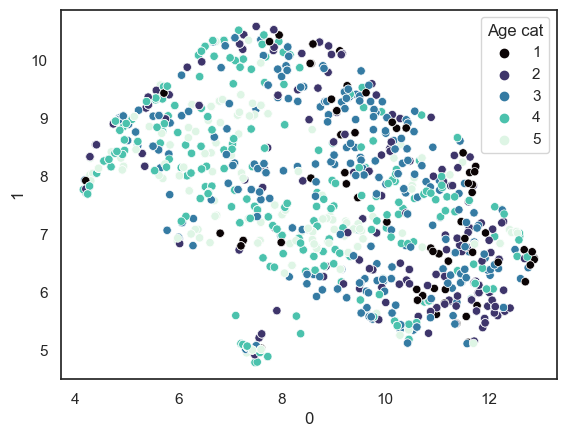

In [192]:
sns.scatterplot(data = final_df, x = 0, y = 1, hue = "Age cat", palette = "mako")

<AxesSubplot:xlabel='0', ylabel='1'>

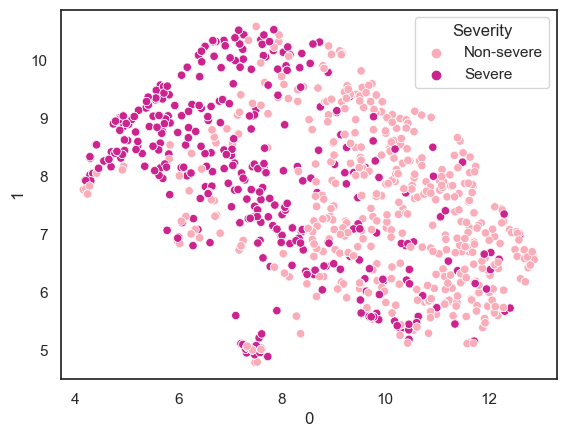

In [193]:
sns.scatterplot(data = final_df, x = 0, y = 1, hue = "Severity", palette = "RdPu")

![...](https://raw.githubusercontent.com/NilsSkoglund/ki_workshop/main/data/olink_umap.png)